## Importamos las librerias que vamos a utlizar en este proyecto, en este caso: Pandas, Numpy y Seaborn

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

## Importamos el dataset .csv


In [86]:
df = pd.read_csv('/Users/agustinpittavino/Proyecto1/Ventas_crudo.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Eliminamos columnas irrelevantes para este analisis


In [87]:
df = df.drop(['about_product', 'user_name', 'review_id', 'review_title', \
             'review_content', 'img_link', 'product_link'], axis=1)



## Aqui realizamos una limpieza y transformacion en los datos, eliminando la simbologia y transformando los datos al tipo que corresponde

In [88]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '')
df['discounted_price'] = pd.to_numeric(df['discounted_price'])


In [89]:
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '')
df['actual_price'] = pd.to_numeric(df['actual_price'])

In [90]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'])
df['discount_percentage'] = df['discount_percentage'] / 100


In [91]:
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [92]:
df1 = df


Al intentar convertir la columna 'rating' a dato numerico, nos aparece que en una row 
hay una simbologia incorrecta ('|'), por ende la identificamos y la reemplazamos por la media de rating

In [93]:

df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')

Vamos a extraer y limpiar la columna 'category'


In [94]:
df1['category'] = df1['category'].astype('str')
## En el dataset, category esta subdividida por '|'
cat_split = df1['category'].str.split('|', expand=True) 
## Extraemos las categorias que son las reelevantes para este tipo de analisis
cat_split = cat_split.rename(columns={0:'main_category', 2:'sub_category'})
cat_split = cat_split.drop(columns=[1, 3, 4, 5, 6])


In [95]:
## Las agregamos al Dataset, y eliminamos la columna 'category'
df1 ['main_category'] = cat_split['main_category']
df1 ['sub_category'] = cat_split['sub_category']
df1 = df1.drop(columns='category')

In [96]:
## Creamos una fila con la diferencia entre el precio actial y el precio de descuento
df1['difference_price'] = df1['actual_price'] - df1['discounted_price']

In [97]:
## Vamos a realizar una limpieza tambien en las columnas main/sub Category
df1['sub_category'] = df1['sub_category'].str.replace('SmallKitchenAppliances', 'Kitchen Apliances').astype('str')
df1['sub_category'] = df1['sub_category'].str.replace('Cables&Accessories', 'Cables & Accessories').astype('str')
df1['sub_category'] = df1['sub_category'].str.replace('MobileAccessories', 'Mobile Accessories').astype('str')
df1['sub_category'] = df1['sub_category'].str.replace('Vacuum,Cleaning&Ironing', 'Vacuum & Cleaning').astype('str')
df1['sub_category'] = df1['sub_category'].str.replace('Smartphones&BasicMobiles', 'Smartphones').astype('str')
df1['sub_category'] = df1['sub_category'].str.replace('Keyboards,Mice&InputDevices', 'Keyboards').astype('str')
df1['sub_category'] = df1['sub_category'].str.replace('WaterHeaters&Geysers', 'SWater Heaters & Geysers').astype('str')
df1['sub_category'] = df1['sub_category'].str.replace('LaptopAccessories', 'Laptop Accessories').astype('str')
df1['sub_category'] = df1['sub_category'].str.replace('WaterPurifiers&Accessories', 'Water Purifiers & Accessories').astype('str')

In [98]:
df1['main_category'] = df1['main_category'].str.replace('Computers&Accessories', 'Computers & Accessories').astype('str')
df1['main_category'] = df1['main_category'].str.replace('Home&Kitchen', 'Home & Kitchen').astype('str')
df1['main_category'] = df1['main_category'].str.replace('OfficeProducts', 'Office Products').astype('str')
df1['main_category'] = df1['main_category'].str.replace('MusicalInstruments', 'Musical Instruments').astype('str')
df1['main_category'] = df1['main_category'].str.replace('HomeImprovement', 'Home Improvement').astype('str')
df1['main_category'] = df1['main_category'].str.replace('Toys&Games', 'Toys & Games').astype('str')
df1['main_category'] = df1['main_category'].str.replace('Car&Motorbike', 'Car & Motorbike').astype('str')
df1['main_category'] = df1['main_category'].str.replace('Health&PersonalCare', 'Health & Personal Care').astype('str')



Limpieza de duplicados y Nan values

In [99]:
df1['sub_category'] = df1['sub_category'].astype('str')

In [100]:
## Encontramos valores nulos en la fila 'sub_category'
df1.loc[df1['sub_category'].isna()]
df1['sub_category'].fillna("Missing")

0                Cables & Accessories
1                Cables & Accessories
2                Cables & Accessories
3                Cables & Accessories
4                Cables & Accessories
                    ...              
1460    Water Purifiers & Accessories
1461                Kitchen Apliances
1462                      RoomHeaters
1463                             Fans
1464                Kitchen Apliances
Name: sub_category, Length: 1465, dtype: object

In [101]:
## No encontramos valores con los datos duplicados
df1.loc[df1.duplicated()]

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,main_category,sub_category,difference_price
393,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",Computers & Accessories,Cables & Accessories,245.0
422,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),229.0,299.0,0.23,4.3,30411.0,"AHW6E5LQ2BDYOIVLAJGDH45J5V5Q,AF74RSGCHPZITVFSZ...",Computers & Accessories,Cables & Accessories,70.0
423,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,299.0,0.33,4.0,43994.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",Computers & Accessories,Cables & Accessories,100.0
428,B08CF3D7QR,Portronics Konnect L POR-1081 Fast Charging 3A...,154.0,339.0,0.55,4.3,13391.0,"AGYLPKPZHVYKKZHOTHCTYVEDAJ4A,AGTTU64JMX722LYCN...",Computers & Accessories,Cables & Accessories,185.0
456,B09KLVMZ3B,Portronics Konnect L 1.2M POR-1401 Fast Chargi...,159.0,399.0,0.60,4.1,4768.0,"AF2XXVO7JUBUVAOBTJ3MNH4DGUFQ,AH6VDJLLPBXKCWXML...",Computers & Accessories,Cables & Accessories,240.0
...,...,...,...,...,...,...,...,...,...,...,...
1007,B0B9BXKBC7,"WeCool S5 Long Selfie Stick, with Large Reinfo...",1799.0,3999.0,0.55,4.6,245.0,"AFPYH3UF3GB4RNX3MX46AXFM2FTQ,AGWEQHJSUA4YCG44R...",Electronics,Mobile Accessories,2200.0
1010,B07GVGTSLN,Wayona Usb Type C Fast Charger Cable Fast Char...,325.0,1299.0,0.75,4.2,10576.0,"AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFXI...",Computers & Accessories,Cables & Accessories,974.0
1017,B0B9BD2YL4,KINGONE Wireless Charging Pencil (2nd Generati...,2599.0,6999.0,0.63,4.5,1526.0,"AEAX7BRPDS3NSYCZQBQDL5DGZDVA,AFI76LT4UP2L3SFJM...",Electronics,Mobile Accessories,4400.0
1018,B0BMXMLSMM,Lapster 65W compatible for OnePlus Dash Warp C...,199.0,999.0,0.80,4.5,127.0,"AHFENRYJG4LPXDTUGEMG335VICSQ,AGSV37DJ5QTUYOXFJ...",Computers & Accessories,Cables & Accessories,800.0


In [102]:
df1.reset_index().head()

,index,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,main_category,sub_category,difference_price
0,0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Computers & Accessories,Cables & Accessories,700.0
1,1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",Computers & Accessories,Cables & Accessories,150.0
2,2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",Computers & Accessories,Cables & Accessories,1700.0
3,3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",Computers & Accessories,Cables & Accessories,370.0
4,4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",Computers & Accessories,Cables & Accessories,245.0


In [103]:
## En este paso, nos percatamos que el DB esta incompleto, ya que disponemos de 1465 rows y de 9050 Usuarios diferentes,
## guardaremos los datos para en un futuro relacionarlos con otros DB
users = df1['user_id'].str.split(',', expand=False)
users_clean = users.explode()
users_clean = users_clean.reset_index(drop=True)
users_clean.value_counts()


user_id
AG5DWPD54QGSLWJ6QUFERLPNAX4Q    11
AE55KTFVNXYFD5FPYWP2OUPEYNPQ    11
AECPFYFQVRUWC3KGNLJIOREFP5LQ    10
AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA    10
AHMGAC6QM62UXNEOCZIHLHSXPP2Q    10
                                ..
AGTC43ZF53CWD5YIEPDMGMDP22TQ     1
AGKSHSI672DMOJKNVYC33PPKNISQ     1
AGK3NNXG44TLWHYTJ2OAY4JMD3VA     1
AF7QEOPISA5J33YVAQWX2EGDEPUQ     1
AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ     1
Name: count, Length: 9050, dtype: int64

In [104]:
df1 = df1.drop(columns='user_id',axis=0)

In [105]:
df1['main_category'].value_counts()

main_category
Electronics                526
Computers & Accessories    453
Home & Kitchen             448
Office Products             31
Musical Instruments          2
Home Improvement             2
Toys & Games                 1
Car & Motorbike              1
Health & Personal Care       1
Name: count, dtype: int64

In [106]:
## Realizamos una transformacion a .csv y guardamos para tener una copia de respaldo del dataset ya limpio
df1.to_csv('/Users/agustinpittavino/Proyecto1/proyect.csv')

In [113]:
df1.head(10)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,main_category,sub_category,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.00,1099.0,0.64,4.2,24269.0,Computers & Accessories,Cables & Accessories,700.00
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.00,349.0,0.43,4.0,43994.0,Computers & Accessories,Cables & Accessories,150.00
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.00,1899.0,0.90,3.9,7928.0,Computers & Accessories,Cables & Accessories,1700.00
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.00,699.0,0.53,4.2,94363.0,Computers & Accessories,Cables & Accessories,370.00
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.00,399.0,0.61,4.2,16905.0,Computers & Accessories,Cables & Accessories,245.00
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,149.00,1000.0,0.85,3.9,24871.0,Computers & Accessories,Cables & Accessories,851.00
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",176.63,499.0,0.65,4.1,15188.0,Computers & Accessories,Cables & Accessories,322.37
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),229.00,299.0,0.23,4.3,30411.0,Computers & Accessories,Cables & Accessories,70.00
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",499.00,999.0,0.50,4.2,179691.0,Computers & Accessories,NetworkAdapters,500.00
9,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.00,299.0,0.33,4.0,43994.0,Computers & Accessories,Cables & Accessories,100.00


## ************ Analisis ************

## Top 10 categorias principales con mas productos vendidos


<Axes: title={'center': 'Unit Sales by Category'}, xlabel='Unit Sales', ylabel='main_category'>

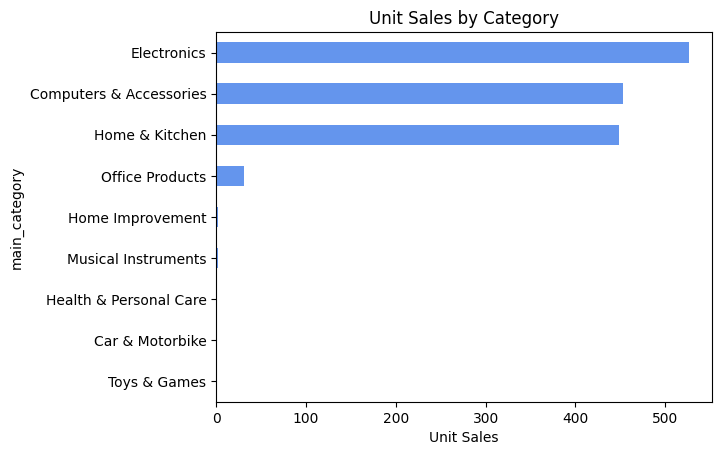

In [107]:
org_main_cat = df1['main_category'] .value_counts()  \
                                    .sort_values(ascending=True)
org_main_cat.head(10).plot(kind='barh', 
                           xlabel='Unit Sales', 
                           title='Unit Sales by Category',
                           color='cornflowerblue')


En base a este grafico, podemos resaltar que la mayor parte de ventas de este eComerce se concentran
en las categoria de Electronics, Computer & Accessories, Home & Kitchen y Office Products, siendo las 
categorias restantes practicamente irrelevantes con respecto a ventas se refiere.


## Ventas por categorias antes de descuentos


In [108]:
sum_cat = df1.groupby(['main_category','sub_category']).agg({'actual_price':['sum']})
sum_cat .sort_values(by=('actual_price', 'sum'), ascending=False)    \
        .head(10)



actual_price
                                                               sum
main_category           sub_category                              
Electronics             Televisions                     2620347.00
                        Smartphones                     1419754.00
                        SmartWatches                     650162.00
Home & Kitchen          Kitchen Apliances                579344.00
                        Vacuum & Cleaning                349129.00
                        SWater Heaters & Geysers         256420.00
Computers & Accessories Cables & Accessories             217397.32
Home & Kitchen          Water Purifiers & Accessories    198045.00
Electronics             Headphones                       182574.00
Home & Kitchen          RoomHeaters                      181032.00

Al igual que en el recuento de unidades vendidas, podemos resaltar que Electronics, Computer & Accessories, Home & Kitchen y Office Prducts poseen la mayor cantidad de dinero recaudado, siendo las Tvs y los
Smartphones los productos que representan las mayores ventas.

## Correlacion entre precio actual y precio con descuento por categoria


<Axes: xlabel='actual_price', ylabel='discounted_price'>

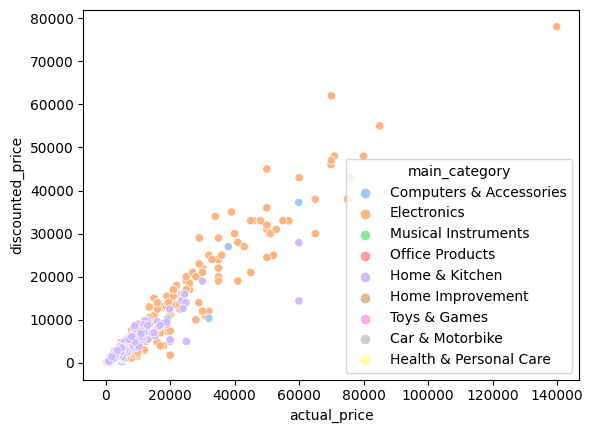

In [109]:
sns.scatterplot(data=df1,
                     x='actual_price',
                     y='discounted_price',
                     hue='main_category',
                     palette='pastel')


En este grafico, podemos resaltar que siendo la categoria Electronics la que dispone de los productos 
mas costosos, tambien dispone del mayor porcentaje de descuento. 
Ademas de ello, nos permite realizar que los descuentos que se les otorgan a los productos, son considerablemente altos, esto da a entender que este eComerce posee una estrategia de ventas particular, habitualmente aplicada en negocios en estapa de crecimiento en el cual consiste en acaparar el mayor volumen de mercado posible, postergando utilidades.

## Conteo de rating


<Axes: xlabel='rating', ylabel='Count'>

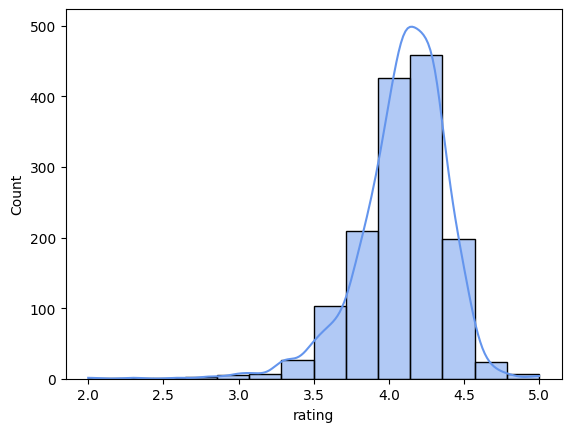

In [110]:
sns.histplot(data=df1, 
             x='rating', 
             bins=14, 
             kde=True,
             color='cornflowerblue')

Este grafico nos permite ver el promedio de rating de los productos, siento este entre 4 y 4,5 puntos, da a entender que el indice de conformidad de los compradores es muy alto, realizando un analisis mas exhausitvo, podriamos determinar el porque de la conformidad de estos, si por el precio, la calidad, la entrega, entre otros factores.

## Top 10 Productos con mayor ganancia post descuento


In [111]:
df1 .groupby('product_name').agg({'discounted_price':['sum']})   \
    .sort_values(by=('discounted_price', 'sum'), ascending=False)   \
    .head(10)

,discounted_price
,sum
product_name,
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black),77990.0
OnePlus 163.8 cm (65 inches) U Series 4K LED Smart Android TV 65U1S (Black),61999.0
VU 164 cm (65 inches) The GloLED Series 4K Smart LED Google TV 65GloLED (Grey),54990.0
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black),47990.0
Samsung 138 cm (55 inches) Crystal 4K Neo Series Ultra HD Smart LED TV UA55AUE65AKXXL (Black),47990.0
MI 138.8 cm (55 inches) 5X Series 4K Ultra HD LED Smart Android TV L55M6-ES (Grey),46999.0
Samsung 138 cm (55 inches) Crystal 4K Series Ultra HD Smart LED TV UA55AUE60AKLXL (Black),45999.0
"OnePlus 10T 5G (Moonstone Black, 8GB RAM, 128GB Storage)",44999.0


En esta tabla podemos destacar que los productos mas repetidos son televisiones, y que a pesar del alto margen descuento otorgado, aun retornan ganancias.

## Categorias con mayor porcentaje de descuento


<Axes: xlabel='discount_percentage', ylabel='main_category'>

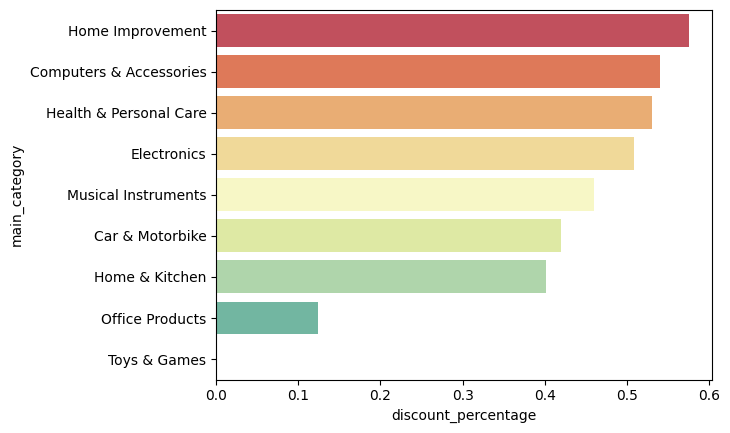

In [112]:
cat_mean = df1  .groupby('main_category').agg({'discount_percentage':'mean'}) \
                .sort_values(by='discount_percentage', ascending=False)

sns.barplot(data=cat_mean, y=cat_mean.index, x='discount_percentage', palette='Spectral',)


Aqui podemos analizar que el promedio de porcentaje de descuento ronda entre un 40% y 50%